In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

In [2]:
# pandas df takes year as YYYY rather than YY
def parse_date(date):
    year = date[:-2] + "20" + date[-2:]
    return year

In [3]:
# reading data into dataframe
df = pd.read_csv("Nat_Gas.csv")
df["Dates"] = df["Dates"].apply(parse_date)
df["Dates"] = pd.to_datetime(df["Dates"])

In [4]:
# converting dates into numerical data
df["Dates_to_ordinal"] = df["Dates"].map(dt.datetime.toordinal)

### Attempt 1: Linear Regression


In [5]:
# performing linear regression
regress = linregress(x=df["Dates_to_ordinal"], y=df["Prices"])
slope = regress.slope
intercept = regress.intercept

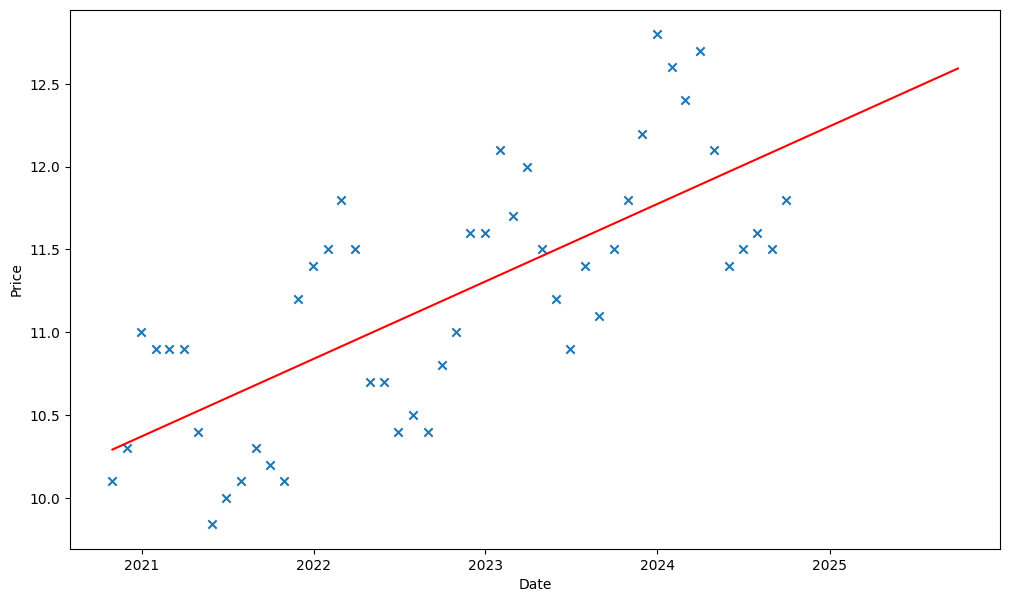

In [6]:
# plotting the data and the linear regression (for visualisation)
plt.figure(figsize=(12,7))
plt.scatter(x="Dates", y="Prices", data=df, marker='x')
x = pd.date_range(start="31-10-2020", end="30-09-2025") # extrapolate for one more year
x_converted = x.map(dt.datetime.toordinal)
y = x_converted * slope + intercept
plt.plot(x, y, "r-")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

### Attempt 2: Curve fitting using a sine curve

In [7]:
# convert to numpy for use in curve_fit function
x_np = df["Dates_to_ordinal"].to_numpy()
y_np = df["Prices"].to_numpy()

In [8]:
# sine function --> y = Asin(Wx + B) + C + Dx
# the trend seems to follow a sinusoidal pattern, C is the initial shift upwards and Dx is
# for the graph to tend upwards as the days progress (x increases). A is amplitude, W is 2pi/period
# B is for phase shift
def sine(x, a, w, b, c, d):
    return a*np.sin(w*x + b) + c + d*x

In [9]:
# from the graph we can guess that A is about 1.5, period is about a year so W is about 2pi/365
# C is about 10. Other constants are defaulted to 0.
constants = curve_fit(f=sine, xdata=x_np, ydata=y_np, maxfev=10000, p0=[1.5, 2*np.pi/365, 0, 10.0, 0])
a = constants[0][0] # 0.6918179658844235
w = constants[0][1] # 0.0173011290846752
b = constants[0][2] # -65.33524573119226
c = constants[0][3] # -1095.8351445646813
d = constants[0][4] # 0.0014991536079920393

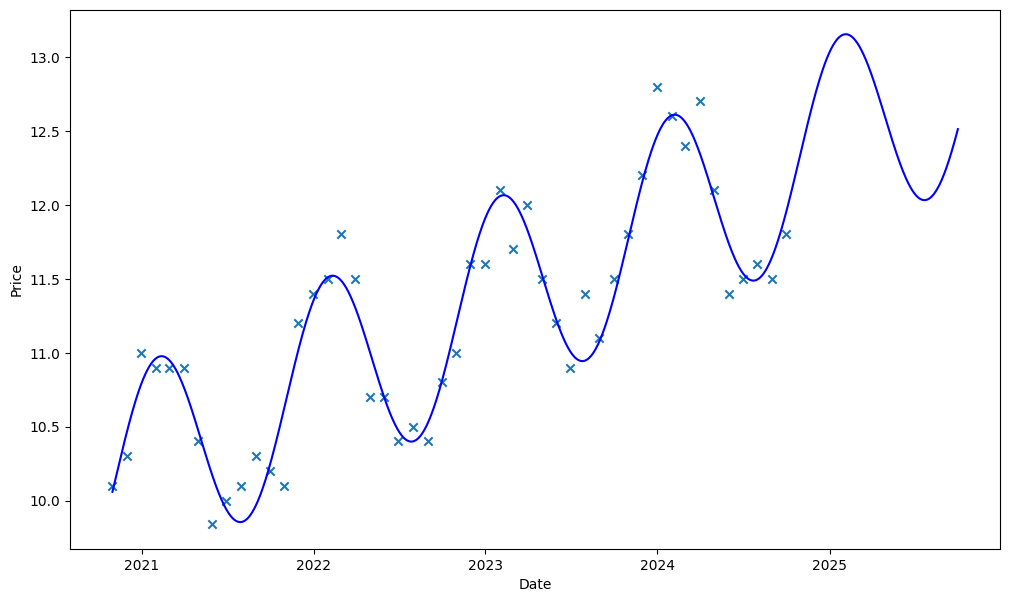

In [10]:
# plotting the data and the new prediction (for visualisation)
plt.figure(figsize=(12,7))
plt.scatter(x="Dates", y="Prices", data=df, marker='x')
x = pd.date_range(start="31-10-2020", end="30-09-2025") # extrapolate for one more year
y = a*np.sin(w*x_converted + b) + c + d*x_converted
plt.plot(x, y, "b-")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show() # close the plot to continue

### Comparing both attempts to see that attempt 2 has a more accurate trend

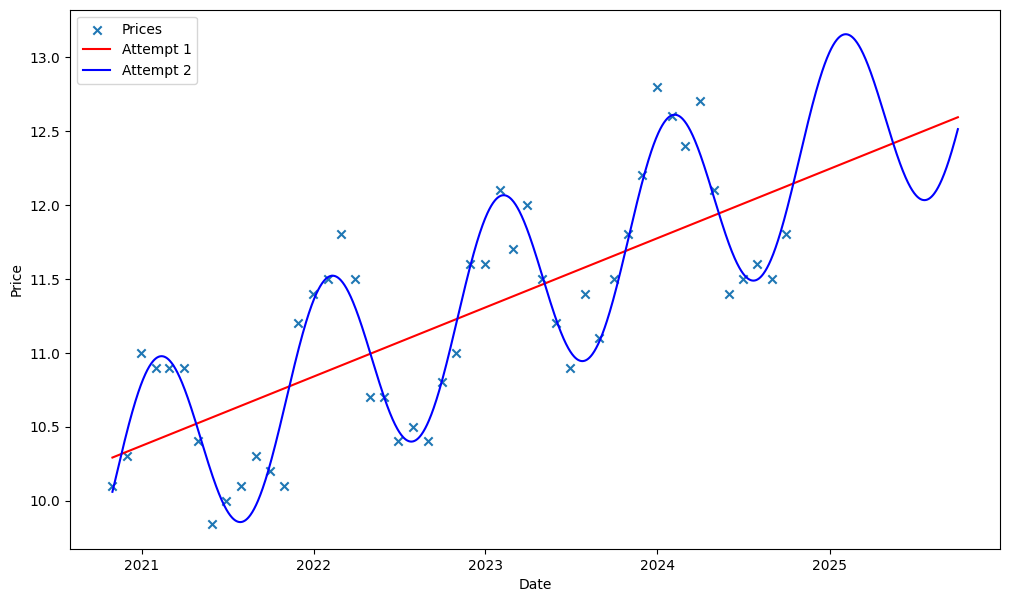

In [11]:
plt.figure(figsize=(12,7))
plt.scatter(x="Dates", y="Prices", data=df, marker='x')
y_1 = x_converted * slope + intercept # attempt 1
y_2 = a*np.sin(w*x_converted + b) + c + d*x_converted # attempt 2
plt.plot(x, y_1, "r-")
plt.plot(x, y_2, "b-")
plt.legend(("Prices", "Attempt 1", "Attempt 2"))
plt.xlabel("Date")
plt.ylabel("Price")
plt.show() # close the plot to continue

### Using the better attempt (attempt 2) to create a prediction function

In [12]:
# prediction function that takes in a date
def predict(year, month, day):
    ordinal = dt.datetime.toordinal(dt.datetime(year, month, day))
    print(f"{a*np.sin(w*ordinal + b) + c + d*ordinal:.2f}")

In [13]:
# keeps prompting until parse-able input
while True:
    date = input("Key in a date in DD-MM-YYYY format to predict price (e.g. 30-11-2023): ")
    correct_format = True
    try:
        res = dt.datetime.strptime(date, "%d-%m-%Y")
    except:
        correct_format = False
        print("Follow the specified format.")

    if correct_format == True:
        break

Key in a date in DD-MM-YYYY format to predict price (e.g. 30-11-2023): 30-11-2023


In [14]:
# prints the prediction
predict(res.year, res.month, res.day)

12.16
